In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [71]:
data = pd.read_csv('../raw_data/test.csv', low_memory=False, index_col='hhid')
data

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,Age abandoned school,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,,
A208004,1.0,1.0,35.0,1.0,1.0,5.0,1.0,2,1.0,2.0,2.0,1.0
A268006,1.0,1.0,31.0,1.0,3.0,7.0,1.0,2,1.0,2.0,2.0,0.0
A536006,2.0,1.0,36.0,1.0,2.0,4.0,1.0,2,1.0,1.0,2.0,1.0
A266008,1.0,1.0,43.0,1.0,3.0,7.0,2.0,2,1.0,1.0,1.0,0.0
A372007,1.0,1.0,33.0,1.0,3.0,4.0,1.0,2,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
A618007,1.0,1.0,37.0,1.0,1.0,5.0,1.0,2,1.0,2.0,2.0,0.0
A571001,1.0,1.0,37.0,1.0,3.0,7.0,2.0,2,1.0,2.0,2.0,0.0
A359007,1.0,2.0,42.0,1.0,1.0,6.0,2.0,2,0.0,2.0,2.0,0.0


In [72]:
data.head()

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,Age abandoned school,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,,
A208004,1.0,1.0,35.0,1.0,1.0,5.0,1.0,2,1.0,2.0,2.0,1.0
A268006,1.0,1.0,31.0,1.0,3.0,7.0,1.0,2,1.0,2.0,2.0,0.0
A536006,2.0,1.0,36.0,1.0,2.0,4.0,1.0,2,1.0,1.0,2.0,1.0
A266008,1.0,1.0,43.0,1.0,3.0,7.0,2.0,2,1.0,1.0,1.0,0.0
A372007,1.0,1.0,33.0,1.0,3.0,4.0,1.0,2,0.0,2.0,1.0,0.0


In [73]:
X = data.drop("Age abandoned school", axis=1)
y = data["Age abandoned school"]

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train.set_index('hhid', inplace=True)
# X_test.set_index('hhid', inplace=True)

oversample = RandomOverSampler(sampling_strategy={0: 1000, 1: 2000})
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_num = X_train.select_dtypes(include=["float64","int64"])
X_test_num = X_test.select_dtypes(include=["float64","int64"])

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())])

pipeline.fit(X_train_num)
X_train_transformed = pipeline.transform(X_train_num)
X_test_transformed = pipeline.transform(X_test_num)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (2000) in class 1 will be larger than the number of samples in the majority class (class #1.0 -> 1800)
  warnings.warn(


In [75]:
X_train_transformed

array([[-0.85928607,  0.79450625,  0.34192426, ...,  0.87982849,
        -1.21608434, -0.79899381],
       [-0.85928607,  0.79450625, -1.15134523, ..., -1.13658516,
         0.7602174 , -0.79899381],
       [-0.85928607, -1.27621648,  0.02193794, ..., -1.13658516,
         0.7602174 , -0.79899381],
       ...,
       [-0.85928607,  0.79450625,  0.87523479, ..., -1.13658516,
        -1.21608434,  0.67607168],
       [ 1.16918883,  0.79450625,  0.02193794, ..., -1.13658516,
        -1.21608434,  0.67607168],
       [ 1.16918883,  0.79450625, -0.51137259, ...,  0.87982849,
         0.7602174 ,  0.67607168]])

In [76]:
X_test_transformed.shape

(594, 11)

In [77]:
from catboost import CatBoostClassifier

catmodel = CatBoostClassifier(
    l2_leaf_reg=1,
    iterations=150,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
)

In [78]:
catmodel.fit(
    X_train_transformed, y_train, 
    eval_set=(X_test_transformed, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [79]:
y_pred_cat = catmodel.predict(X_test_transformed)
y_pred_cat

array([1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0.

In [80]:
cm_rf = confusion_matrix(y_test, y_pred_cat)
cm_rf

array([[ 96,  51],
       [201, 246]])

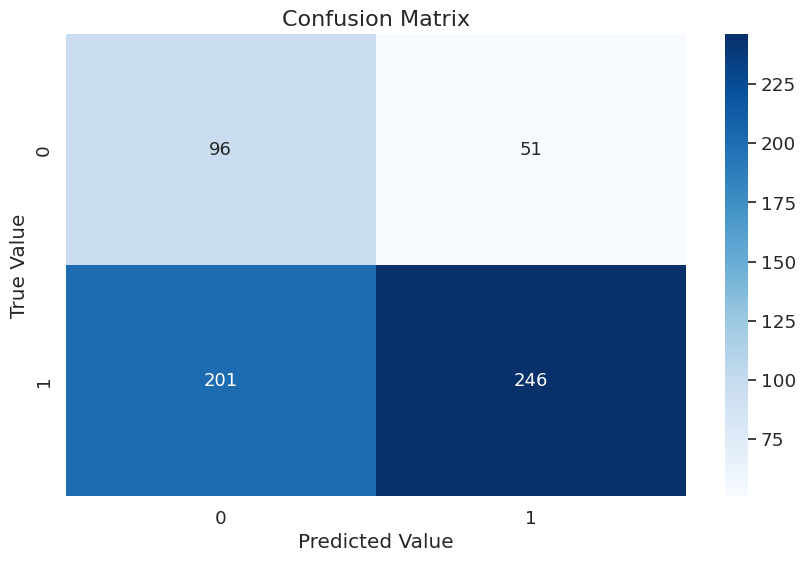

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt = "g",cmap = "Blues",annot_kws={"size": 13})
sns.set(font_scale=1.2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

# Expanation of values:

* 95 cases were correctly identified as "Dropout"
* 49 cases were "Dropout" but were incorrectly classified as "Enrolled"
* 201 cases were "Enrolled" but were incorrectly classified as "Dropout"
* 249 cases were correctly identified as "Enrolled"

# Redefining my X and Y split and use validation data

In [82]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [83]:
X

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,
A208004,1.0,1.0,35.0,1.0,1.0,5.0,1.0,2,2.0,2.0,1.0
A268006,1.0,1.0,31.0,1.0,3.0,7.0,1.0,2,2.0,2.0,0.0
A536006,2.0,1.0,36.0,1.0,2.0,4.0,1.0,2,1.0,2.0,1.0
A266008,1.0,1.0,43.0,1.0,3.0,7.0,2.0,2,1.0,1.0,0.0
A372007,1.0,1.0,33.0,1.0,3.0,4.0,1.0,2,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
A618007,1.0,1.0,37.0,1.0,1.0,5.0,1.0,2,2.0,2.0,0.0
A571001,1.0,1.0,37.0,1.0,3.0,7.0,2.0,2,2.0,2.0,0.0
A359007,1.0,2.0,42.0,1.0,1.0,6.0,2.0,2,2.0,2.0,0.0


In [84]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [85]:
val = Pool(data= X_val, label= y_val)

In [86]:
catmodel = CatBoostClassifier(
    l2_leaf_reg=2,
    iterations=200,  
    learning_rate=0.001, 
    depth = 8,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
    early_stopping_rounds=20,
    random_state=20
)

In [87]:
catmodel.fit(X_train, y_train, eval_set = val, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [88]:
y_pred = catmodel.predict(X_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0.

In [89]:
y_test.value_counts()

1.0    447
0.0    147
Name: Age abandoned school, dtype: int64

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[118,  29],
       [194, 253]])

# So now my model is able to predict: 

* 118 students were correctly predicted to dropout
* 29 students were predicted to enrol but they actually dropped out
* 194 students were predicted to dropout but they actually enrolled
* 253 students were correctly predicted as enrolled

In [91]:
score = classification_report(y_test, y_pred, target_names = ['Dropout', 'Enroled'])
print(score)

              precision    recall  f1-score   support

     Dropout       0.38      0.80      0.51       147
     Enroled       0.90      0.57      0.69       447

    accuracy                           0.62       594
   macro avg       0.64      0.68      0.60       594
weighted avg       0.77      0.62      0.65       594



In [92]:
X_test.head()

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,
A080008,1.0,1.0,40.0,1.0,1.0,5.0,2.0,2,2.0,2.0,0.0
A210004,1.0,1.0,55.0,1.0,3.0,4.0,2.0,2,2.0,2.0,1.0
A098007,2.0,2.0,63.0,1.0,1.0,9.0,1.0,2,1.0,1.0,0.0
A221002,1.0,2.0,39.0,1.0,2.0,6.0,1.0,2,2.0,2.0,0.0
A164001,2.0,1.0,63.0,1.0,3.0,5.0,1.0,2,1.0,1.0,0.0


In [93]:
y_prob = catmodel.predict_proba(X_test)
y_prob

array([[0.50330835, 0.49669165],
       [0.4883178 , 0.5116822 ],
       [0.50457493, 0.49542507],
       ...,
       [0.42911577, 0.57088423],
       [0.50475544, 0.49524456],
       [0.49113361, 0.50886639]])

In [94]:
def generate_random_students(num_students):
    feature_ranges = {
        'mother_alive': [1, 2],
        'father_alive': [1, 2],
        'parents_age': [20, 60],
        'marital_status': [1, 2],
        'parents_level_ed': [1, 3],
        'num_per_house': [1, 10],
        'mobile_phones': [1, 3],
        'individual_water_net': [1, 2],
        'subtraction_res': [1, 2],
        'division_res': [1, 2],
        'work_activity_classified': [0, 2]
    }

    random_data = {}
    for feature, (low, high) in feature_ranges.items():
        random_data[feature] = np.random.randint(low, high + 1, num_students)


    random_students = pd.DataFrame(random_data)

    return random_students



# work_activity

**Full time** - **0**
* 1 - Worked in a permament fashion, on his/her own account
* 2 - Worked in a permanent fashion on another's account

**Part Time** - **1**
* 3 - Worked in an occassional fashion

**Not working** - **2**
* 9 - Did not work
* 4 - Searched for work
* 5 - Completed domestick tasks
* 7 - Was sick 
* 8 - Retiremen 



# No education

* 1 - None

**Primary**

* 3 - Primary

**Koranic**

* 2 - Koranic

**Middle**

* 4 - Middle

**High school**

* 5 - Middle

**Higher education**

* 6 - Higher education

**Middle**

* 7 - Professional

In [95]:
new_students = generate_random_students(5)
new_students

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,subtraction_res,division_res,work_activity_classified
0,1,2,53,2,2,8,2,1,2,2,0
1,1,2,26,2,3,3,1,1,2,1,1
2,2,1,58,2,2,7,1,1,2,2,0
3,2,1,37,2,1,2,3,2,2,2,0
4,1,1,26,2,3,4,2,1,1,1,2


In [96]:
predictions = catmodel.predict(new_students)
predictions

array([0., 1., 0., 1., 1.])

In [97]:
new_students['Predicted_Dropout'] = predictions

In [98]:
new_students

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,subtraction_res,division_res,work_activity_classified,Predicted_Dropout
0,1,2,53,2,2,8,2,1,2,2,0,0.0
1,1,2,26,2,3,3,1,1,2,1,1,1.0
2,2,1,58,2,2,7,1,1,2,2,0,0.0
3,2,1,37,2,1,2,3,2,2,2,0,1.0
4,1,1,26,2,3,4,2,1,1,1,2,1.0


In [99]:
dropout_probabilities = catmodel.predict_proba(new_students)


threshold = 0.40


dropout_prediction = (dropout_probabilities[0][0] > threshold).astype(int)

print(f'The model predicts the student will {"remain at school" if dropout_prediction else "drop out"}.')

The model predicts the student will remain at school.


In [100]:
dropout_probability = catmodel.predict_proba(new_students)
dropout_probability

array([[0.51463516, 0.48536484],
       [0.47721235, 0.52278765],
       [0.50304974, 0.49695026],
       [0.47818542, 0.52181458],
       [0.4751425 , 0.5248575 ]])

In [101]:
print(f'The model estimates there is a {dropout_probability[0][0] * 100:.2f}% chance the student will drop out.')

The model estimates there is a 51.46% chance the student will drop out.
